In [1]:

from sklearn.base import TransformerMixin, BaseEstimator

from collections import Counter , defaultdict

import pandas as pd

pd.set_option('display.max_columns', None)


from pandas import Series as s , DataFrame as df
import numpy as np

import seaborn as sns
# import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt, rcParams as rc


%matplotlib inline
rc["figure.figsize"] = 10,6

import datetime
import datetime as dt

from sklearn.model_selection  import StratifiedKFold
from sklearn.decomposition import PCA

from iteration_utilities import duplicates, unique_everseen

import sys
from itertools import groupby
from operator import itemgetter
from timeit import timeit


## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler # over sampling method 2

Using TensorFlow backend.


In [2]:

#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import MultinomialNB

# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

#preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler, normalize



from sklearn.model_selection import train_test_split

# import lightgbm as lgb


#Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_fscore_support

from sklearn.pipeline import Pipeline

# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [3]:
train = pd.read_csv("train_fNxu4vz.csv")

test = pd.read_csv("test_fjtUOL8.csv")
submission = pd.read_csv("sample_submission_HSqiq1Q.csv")

#df10 = df.copy()
train.shape, test.shape, submission.shape

((164309, 14), (109541, 13), (109541, 2))

In [4]:
df = train.copy() 
df_test = test.copy() 

In [5]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
    
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : ", higher_miss_value_column)
    else:
        print("There are no Higher Column Missing values in Dataset")

In [6]:
get_percentage_miss_value(df)

Column->  Length_Employed , total no of missing value :  7371  & :          4.49  %
Column->  Home_Owner , total no of missing value :  25349  & :          15.43  %
Column->  Annual_Income , total no of missing value :  25102  & :          15.28  %
Column->  Months_Since_Deliquency , total no of missing value :  88379  & :          53.79  %




Higher Missing values in Columns for Delete :  ['Months_Since_Deliquency']


In [7]:
get_percentage_miss_value(df_test)

Column->  Length_Employed , total no of missing value :  4936  & :          4.51  %
Column->  Home_Owner , total no of missing value :  16711  & :          15.26  %
Column->  Annual_Income , total no of missing value :  16898  & :          15.43  %
Column->  Months_Since_Deliquency , total no of missing value :  58859  & :          53.73  %




Higher Missing values in Columns for Delete :  ['Months_Since_Deliquency']


In [8]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            
            
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            

def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            
            print("*"*100)
            print("\n")
            

In [9]:
check_cloumn_details_type_categorical(df)

Columns name :   Loan_Amount_Requested
{'7,000': 2628, '30,000': 2909, '24,725': 15, '16,000': 4376, '17,000': 1093, '4,500': 527, '18,075': 53, '15,000': 8459, '6,300': 125, '11,700': 168, '7,200': 1283, '6,700': 102, '35,000': 5844, '20,800': 106, '19,925': 6, '25,000': 4001, '6,000': 4790, '4,000': 2112, '8,000': 5174, '12,000': 9018, '9,050': 28, '2,200': 99, '20,000': 7993, '21,700': 9, '8,875': 343, '10,075': 84, '28,625': 70, '2,700': 88, '21,000': 2038, '8,400': 734, '3,250': 143, '11,850': 86, '1,500': 386, '30,700': 1, '4,175': 9, '11,000': 1353, '31,050': 6, '33,150': 11, '5,400': 255, '11,100': 165, '29,175': 103, '22,500': 161, '22,000': 1018, '19,075': 96, '18,000': 3992, '28,000': 2460, '10,800': 484, '16,575': 28, '7,800': 292, '9,750': 291, '10,225': 31, '5,000': 4842, '13,200': 323, '9,500': 356, '18,600': 49, '9,800': 188, '10,000': 11622, '8,500': 645, '13,000': 1470, '3,500': 647, '22,400': 169, '4,200': 424, '24,000': 3526, '14,000': 2509, '2,000': 970, '14,100': 

{'not verified': 51873, 'VERIFIED - income': 59421, 'VERIFIED - income source': 53015}
****************************************************************************************************


Columns name :   Purpose_Of_Loan
{'car': 1885, 'debt_consolidation': 97101, 'credit_card': 36684, 'home_improvement': 9269, 'major_purchase': 3435, 'other': 8346, 'medical': 1541, 'small_business': 2392, 'moving': 974, 'wedding': 828, 'vacation': 837, 'house': 773, 'educational': 121, 'renewable_energy': 123}
****************************************************************************************************


Columns name :   Gender
{'Female': 47133, 'Male': 117176}
****************************************************************************************************




In [10]:
# check_cloumn_details_type_float(df)

In [11]:
def visualize_histogram(dataset):
    # plot histogram
    plt.figure(figsize=(25, 9))  # figure size in ratio 16:9
    features = dataset.columns  # list of columns name
    for i, j in enumerate(features):
        plt.subplot(3, 3, i + 1)  # create subplot for histogram
        plt.title("Histogram of {}".format(j), fontsize=15)  # title of histogram

        bins = len(dataset[j].unique())  # bins for histogram
        plt.hist(dataset[j], bins=bins, rwidth=0.8, edgecolor="y", linewidth=2, )  # plot histogram

    plt.subplots_adjust(hspace=0.5)  # space between horixontal axes (subplots)

In [12]:
# visualize_histogram(df)

In [13]:
# visualize_numberical_values(df)

In [14]:
#Label encoding
def convert_to_numerical_label_encoding(dataset):
    enc = LabelEncoder()
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            dataset[i] = enc.fit_transform(dataset[i])
            
    return dataset

In [15]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    


In [16]:
def majority_imbalanced_dataset(dataset, target_col):
    feature_columns = dataset.columns.tolist()
    feature_columns = [c for c in feature_columns if c not in [target_col]]

    X2_new = dataset[feature_columns]
    Y2_new = dataset[target_col]

    os =  RandomOverSampler(random_state=35)
    X_feature_variables , y_output = os.fit_sample(X2_new, Y2_new)
    
    X_feature_variables[target_col] = y_output
    
    X_feature_variables = X_feature_variables.sample(frac = 1).reset_index(drop = True)
    
    return X_feature_variables

In [17]:
def standardscaler_preprocessing(dataset_train, dataset_test, num_col):
    scaler = StandardScaler()
   
    dataset_train[num_col] = scaler.fit_transform(dataset_train[num_col])

    dataset_test[num_col] = scaler.transform(dataset_test[num_col])
    
    return dataset_train, dataset_test

In [18]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
Loan_ID                    164309 non-null int64
Loan_Amount_Requested      164309 non-null object
Length_Employed            156938 non-null object
Home_Owner                 138960 non-null object
Annual_Income              139207 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    75930 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
Interest_Rate              164309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 13.8+ MB


In [20]:
df.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [21]:
Counter(df.Interest_Rate)

Counter({1: 33806, 3: 59923, 2: 70580})

In [22]:
df.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


# <font color ='green' > Step 1: EDA

In [23]:
# df = train.copy() 
# df_test = test.copy() 

In [24]:
print(df.shape)
print(df_test.shape)

del df['Loan_ID']
del df_test['Loan_ID']

print(df.shape)
print(df_test.shape)

(164309, 14)
(109541, 13)
(164309, 13)
(109541, 12)


In [25]:
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(',','').astype(np.float64)

df_test['Loan_Amount_Requested'] = df_test['Loan_Amount_Requested'].str.replace(',','').astype(np.float64)

In [26]:
# Counter(df.Loan_Amount_Requested)

In [27]:
#Missing value imputation for Train
df.Months_Since_Deliquency.fillna(0, inplace = True)
df.Annual_Income.fillna(0, inplace = True) # Another option is to impute mean to checck model performance
df.Home_Owner.fillna('msg2drop', inplace = True)
df.Length_Employed.fillna('msg2drop', inplace = True)


#Missing value imputation for test
df_test.Months_Since_Deliquency.fillna(0, inplace = True)
df_test.Annual_Income.fillna(0, inplace = True) # Another option is to impute mean to checck model performance
df_test.Home_Owner.fillna('msg2drop', inplace = True)
df_test.Length_Employed.fillna('msg2drop', inplace = True)

In [28]:
#outlier managegment
originalCount = len(df)
df = df[df['Annual_Income'] <= 225000]
df = df[df['Months_Since_Deliquency'] <= 80]
df = df[df['Number_Open_Accounts'] <= 30]
df = df[df['Total_Accounts'] <= 68]

finalCount  = len(df)
print('Original Count -', originalCount , ', Final Count -', finalCount,  ', Dropped -', originalCount - finalCount, '(', round(finalCount/originalCount,4), '%)') 


Original Count - 164309 , Final Count - 161232 , Dropped - 3077 ( 0.9813 %)


In [29]:
dummy_col_list = ['Length_Employed', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']

df = pd.get_dummies(df, columns=dummy_col_list)


df_test = pd.get_dummies(df_test, columns=dummy_col_list)



In [30]:
df.shape, df_test.shape

((161232, 45), (109541, 44))

In [31]:
#dropping 1 column from each category dummy variable list

drop_col = ['Length_Employed_msg2drop','Home_Owner_msg2drop','Income_Verified_VERIFIED - income',
            'Purpose_Of_Loan_renewable_energy','Gender_Male']

df = df.drop(drop_col, axis = 1)


df_test = df_test.drop(drop_col, axis = 1)


In [32]:
df.shape, df_test.shape

((161232, 40), (109541, 39))

In [33]:
df.rename(columns = {'Length_Employed_< 1 year':'Length_Employed_ 1 year'}, inplace = True)
df_test.rename(columns = {'Length_Employed_< 1 year':'Length_Employed_ 1 year'}, inplace = True)

In [34]:
df_test.columns

Index(['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Length_Employed_1 year', 'Length_Employed_10+ years',
       'Length_Employed_2 years', 'Length_Employed_3 years',
       'Length_Employed_4 years', 'Length_Employed_5 years',
       'Length_Employed_6 years', 'Length_Employed_7 years',
       'Length_Employed_8 years', 'Length_Employed_9 years',
       'Length_Employed_ 1 year', 'Home_Owner_Mortgage', 'Home_Owner_None',
       'Home_Owner_Other', 'Home_Owner_Own', 'Home_Owner_Rent',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',


# <font color ='red' > Step 2: EDA

In [35]:
# df.head()

In [36]:
# df1["Type_of_Cab"] = df1["Type_of_Cab"].fillna("Unkown")
# df1["Confidence_Life_Style_Index"] = df1["Confidence_Life_Style_Index"].fillna("Unkown")


# df2 = DataFrameImputer().fit_transform(df.copy())
# df2_test = DataFrameImputer().fit_transform(df_test.copy())


# df3 = convert_to_numerical_label_encoding(df2.copy())
# df2.shape, df3.shape

# df3_test = convert_to_numerical_label_encoding(df2_test.copy())
# df2_test.shape, df3_test.shape

# df3 = majority_imbalanced_dataset(df3.copy(), "Interest_Rate")
# Counter(df4.Surge_Pricing_Type)


# scaling_col = ["Annual_Income", "Debt_To_Income","Inquiries_Last_6Mo", "Months_Since_Deliquency", 
#               "Number_Open_Accounts", "Total_Accounts", "Interest_Rate"]


# df4, df4_test = standardscaler_preprocessing(df3.copy(), df3_test.copy(), scaling_col)

In [37]:
df.isna().sum().sum() , df_test.isna().sum().sum()

(0, 0)

In [38]:
def convert_numerical_data_type(dataset):
    col_list = list(dataset.select_dtypes(include =  ["int" , "float"] ).columns)
    for numberical_colname in col_list:
        dataset[numberical_colname] = pd.to_numeric(dataset[numberical_colname])  
    
    return dataset

In [39]:
df3 = convert_numerical_data_type(df.copy())
df3_test = convert_numerical_data_type(df_test.copy())

In [40]:
df3.columns

Index(['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Interest_Rate', 'Length_Employed_1 year',
       'Length_Employed_10+ years', 'Length_Employed_2 years',
       'Length_Employed_3 years', 'Length_Employed_4 years',
       'Length_Employed_5 years', 'Length_Employed_6 years',
       'Length_Employed_7 years', 'Length_Employed_8 years',
       'Length_Employed_9 years', 'Length_Employed_ 1 year',
       'Home_Owner_Mortgage', 'Home_Owner_None', 'Home_Owner_Other',
       'Home_Owner_Own', 'Home_Owner_Rent',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'P

In [41]:
fetaaure_col = ['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Length_Employed_1 year',
       'Length_Employed_10+ years', 'Length_Employed_2 years',
       'Length_Employed_3 years', 'Length_Employed_4 years',
       'Length_Employed_5 years', 'Length_Employed_6 years',
       'Length_Employed_7 years', 'Length_Employed_8 years',
       'Length_Employed_9 years', 'Length_Employed_ 1 year',
       'Home_Owner_Mortgage', 'Home_Owner_None', 'Home_Owner_Other',
       'Home_Owner_Own', 'Home_Owner_Rent',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_small_business',
       'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding', 'Gender_Female']

len(fetaaure_col)

39

In [42]:
X = df3.loc[:,fetaaure_col]

Y = df3.loc[:, ["Interest_Rate"]]

In [43]:
len(X) , len(Y), X.shape

(161232, 161232, (161232, 39))

In [44]:
%%time
model_xgb = XGBClassifier(max_depth=5, objective='multi:softmax', num_classes=3)
model_xgb.fit(X, Y)
y_pred_final = model_xgb.predict(df3_test)


Wall time: 1min 6s


In [45]:
# model_lgb= LGBMClassifier(n_estimators= 200, objective='multi:softmax', num_classes=3)
# model_lgb.fit(X,Y)
# y_pred_final = model_lgb.predict(df3_test)

In [46]:

# model_catg= CatBoostClassifier(depth= 3,l2_leaf_reg= 1e-25,learning_rate= 0.07,
#                                loss_function= 'MultiClass',n_estimators= 200)
# model_catg.fit(X,Y)
# y_pred_final = model_catg.predict(df3_test)

In [47]:
def create_submission_file(model, file_name, testDF = df3_test):
    y_pred_final = model.predict(testDF)

    submission_1 = submission.copy()

    print(df_test.shape , submission.shape , len(y_pred_final))

    submission_1["Interest_Rate"] = y_pred_final

    print(submission_1["Interest_Rate"].values)


    submission_1.to_csv(file_name+'.csv', index=False)

    df_submission_1 = pd.read_csv(file_name+'.csv')

    print(df_submission_1.shape)

    print(df_submission_1.head(3))

In [50]:
# dferror.head()

# Other basic Models

In [51]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [52]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

#Preparing DataFrame to store individual model performance for comparison:
dfTracker = pd.DataFrame(columns=['model', 'train_accuracy', 'train_recall', 'train_precisiom', 'train_f1', 'train_confusionMatrix',
                                  'test_accuracy', 'test_recall', 'test_precisiom', 'test_f1', 'test_confusionMatrix'])

#Creating function to store as well as print performance data
def tracker(dfTracker, model, y_train, train_predictions, y_test,test_predictions ):
    
    dfTracker = dfTracker.append({'model' : model,'train_accuracy':accuracy_score(y_train,train_predictions), 
    'train_recall':recall_score(y_train,train_predictions),'train_precisiom':precision_score(y_train,train_predictions),
     'train_f1':f1_score(y_train,train_predictions),'test_accuracy':accuracy_score(y_test,test_predictions),
    'train_confusionMatrix':confusion_matrix(y_train,train_predictions),
    'test_recall':recall_score(y_test,test_predictions),'test_precisiom':precision_score(y_test,test_predictions), 
     'test_f1':f1_score(y_test,test_predictions),
     'test_confusionMatrix':confusion_matrix(y_test,test_predictions)}, ignore_index=True)
    
    print("Classification Report:")
    print(classification_report(y_test,test_predictions))
    print("confusion_matrix:")
    print(confusion_matrix(y_test,test_predictions))
    
    draw_roc( y_test, test_predictions)

    return dfTracker


In [53]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)



## Random Forest : Without PCA
Let's first fit a random forest model with default hyperparameters.

In [54]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [55]:
%%time
# fit using default arameters
rfc.fit(X,Y)
create_submission_file(rfc, 'amit_rand_forest_base')

(109541, 39) (109541, 2) 109541
[2 1 2 ... 2 3 2]
(109541, 2)
    Loan_ID  Interest_Rate
0  10164310              2
1  10164311              1
2  10164312              2
Wall time: 1min 7s


In [56]:
%%time
# model with specific hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=25,
                             n_estimators=200)
rfc.fit(X_train,y_train)
create_submission_file(rfc, 'amit_rand_forest_param_001')

(109541, 39) (109541, 2) 109541
[2 1 3 ... 2 3 2]
(109541, 2)
    Loan_ID  Interest_Rate
0  10164310              2
1  10164311              1
2  10164312              3
Wall time: 1min 53s


# Scaling

In [57]:
# Importing further libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [58]:
# Scaling X_train
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X)

In [59]:
# Scaling X_test
X_test_sc = scaler.transform(df3_test)



## Logistic Regression : Without PCA


In [60]:
%%time
from sklearn.linear_model import LogisticRegression

# fit using default arameters
log_reg = LogisticRegression()

log_reg.fit(X_train_sc, Y)
create_submission_file(log_reg, 'amit_logit', X_test_sc)

(109541, 39) (109541, 2) 109541
[2 1 2 ... 2 3 2]
(109541, 2)
    Loan_ID  Interest_Rate
0  10164310              2
1  10164311              1
2  10164312              2
Wall time: 13.7 s




## Naive Baye's - Multinomial : Without PCA


In [61]:
%%time
mnb = MultinomialNB()

mnb.fit(X_train_sc, Y)
create_submission_file(mnb, 'amit_Naive_mnb', X_test_sc)

(109541, 39) (109541, 2) 109541
[3 2 2 ... 2 3 2]
(109541, 2)
    Loan_ID  Interest_Rate
0  10164310              3
1  10164311              2
2  10164312              2
Wall time: 716 ms




## Naive Baye's - Bernouilli : Without PCA


In [62]:
# fit using default arameters
bnb = BernoulliNB()

bnb.fit(X_train_sc, Y)
create_submission_file(bnb, 'amit_Naive_bnb', X_test_sc)

(109541, 39) (109541, 2) 109541
[2 1 3 ... 1 2 2]
(109541, 2)
    Loan_ID  Interest_Rate
0  10164310              2
1  10164311              1
2  10164312              3




## SVM : Without PCA


In [63]:
# # fit using default arameters
# svc = SVC(C = 1, kernel = 'rbf')
# svc.fit(X, Y)
# create_submission_file(bnb, 'amit_svc_basic')

# PCA Data Prep

In [64]:
# Fitting PCA
pca = PCA(random_state = 100)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [65]:
# Cumulative variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)

### Drawing Scree Plot

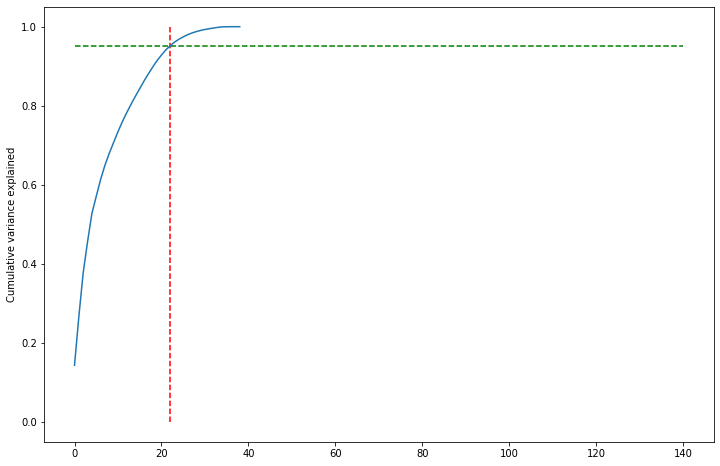

In [66]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=22, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=140, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [67]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA

In [68]:
# Incremental PCA initialisation
pca_final = IncrementalPCA(n_components=22)

In [69]:
# fitting scaled X_train to Incremental PCA
X_train_pca = pca_final.fit_transform(X_train_sc)

In [70]:
X_train_pca.shape

(161232, 22)

In [71]:
# Checking for correlation of Princial Components
corrmat = np.corrcoef(X_train_pca.transpose())

In [72]:
corrmat.shape

(22, 22)

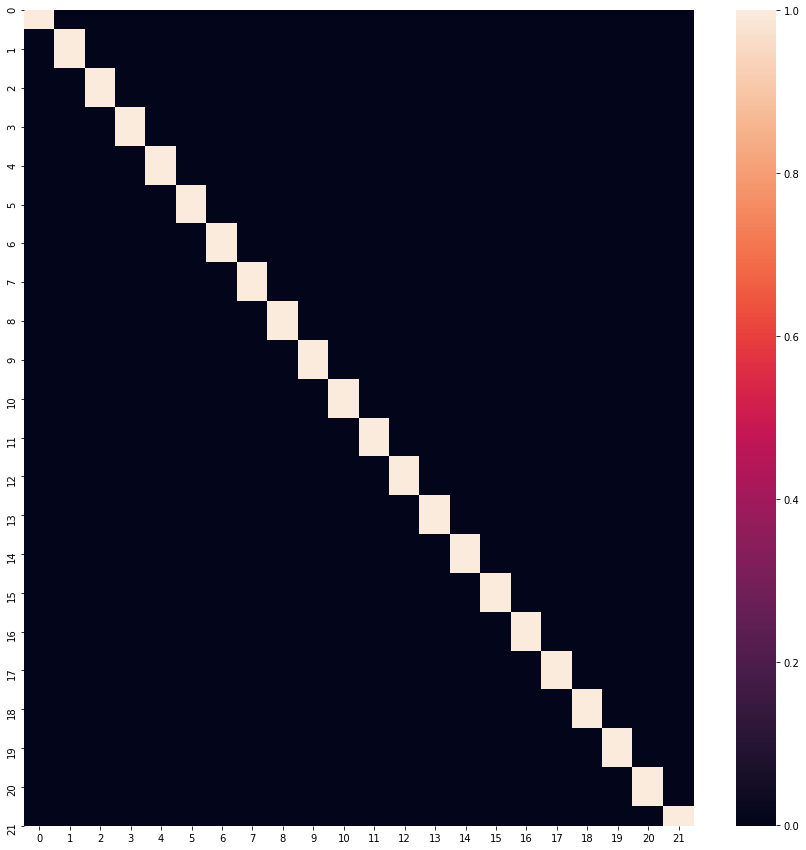

In [73]:
# Plotting heatmap of correlation matrix
plt.figure(figsize=[15,15])
sns.heatmap(corrmat)

#### Heat map shows `ZERO` correlation between Principal components

Applying the transformation on the test set

In [74]:
# Transforming scaled X_test to Principal components
X_test_pca = pca_final.transform(X_test_sc)
X_test_pca.shape

(109541, 22)

In [75]:
X_test_pca.shape

(109541, 22)



## Models With PCA

In [76]:
%%time
rfc = RandomForestClassifier()
rfc.fit(X_train_pca,Y)
create_submission_file(rfc, 'amit_rand_forest_base_pca', testDF = X_test_pca)

(109541, 39) (109541, 2) 109541
[2 1 2 ... 2 3 2]
(109541, 2)
    Loan_ID  Interest_Rate
0  10164310              2
1  10164311              1
2  10164312              2
Wall time: 2min 34s


In [77]:
create_submission_file(rfc, 'amit_rand_forest_base_pca', testDF = X_test_pca)

(109541, 39) (109541, 2) 109541
[2 1 2 ... 2 3 2]
(109541, 2)
    Loan_ID  Interest_Rate
0  10164310              2
1  10164311              1
2  10164312              2


In [78]:
%%time
log_reg.fit(X_train_pca, Y)
create_submission_file(log_reg, 'amit_logit_pca', testDF = X_test_pca)

(109541, 39) (109541, 2) 109541
[3 1 2 ... 2 3 2]
(109541, 2)
    Loan_ID  Interest_Rate
0  10164310              3
1  10164311              1
2  10164312              2
Wall time: 4.38 s


In [79]:
%%time
bnb.fit(X_train_pca, Y)
create_submission_file(bnb, 'amit_naive_bnb_pca', X_test_pca)

(109541, 39) (109541, 2) 109541
[3 2 3 ... 2 2 2]
(109541, 2)
    Loan_ID  Interest_Rate
0  10164310              3
1  10164311              2
2  10164312              3
Wall time: 1.4 s


## Random Forest: Grid Search to Find Optimal Hyperparameters

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8, 12, 20],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [15, 20, 25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           scoring=['f1_micro','recall_micro','precision_micro'],
                             refit='f1_micro', 
                           cv = 5, n_jobs = -1,verbose = 1)

In [86]:
%%time
# Fit the grid search to the data
grid_search.fit(X, Y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 31.8min


KeyboardInterrupt: 

In [88]:
# printing the optimal recall score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
%%time
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=25,
                             n_estimators=200)
rfc.fit(X_train,y_train)
create_submission_file(rfc, 'amit_rand_forest_param_002', X_test_pca)
